# Simple ``maxsmooth`` Example Code

This section is designed to introduce the user to the software and the form in which it is run. In order to run the ``maxsmooth`` software using the built in DCFs the user can follow the simple structure detailed here.

An important point to make is that by default ``maxsmooth`` fits a Maximally Smooth Function or MSF to the data. An MSF, as stated in the introduction to the documentation, is a function which has derivatives of order $m \geq 2$ constrained so that they do not cross 0. This means that they do not have inflection points or non smooth structure produced by higher order derivatives. More generally a DCF follows the constraint,

$ \frac{\delta^m y}{\delta x^m} \leq 0 ~~\mathrm{or}~~ \frac{\delta^m y}{\delta x^m} \geq 0 $

for every constrained order $m$. The set of $m$ can be any set of derivative orders as long as those derivatives exist for the function.

This means we can use ``maxsmooth`` to produce different DCF models. MSFs are one of two special cases of DCF and we can also have a Completely Smooth Function (CSF) with orders $m \geq 1$ constrained. Alternatively we can have Partially Smooth Functions (PSF) which are much more general and can have arbitrary sets of derivatives constrained. We illustrate how this is implemented towards the end of this example but we begin with the default case fitting a MSF.

The user should begin by importing the *smooth* class from *maxsmooth.DCF*.

In [1]:
from maxsmooth.DCF import smooth

The user should then import the data they wish to fit and define the order of the function they wish to fit with. We can also plot the data to illustrate what is happening. Here the 'y' data is a scaled $x^{-2.5}$ power law and I have added gaussian noise in with a standard deviation of 0.02.

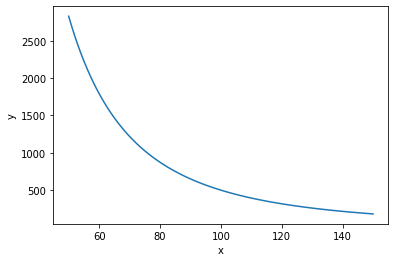

In [2]:
import numpy as np

x = np.load('Data/x.npy')
y = np.load('Data/y.npy') + np.random.normal(0, 0.02, len(x))

N = 15

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*smooth* can be called as is shown below. It takes the x and y data as standard inputs as well as the order of the fit. There are a set of keyword arguments also available that change the type of function being fitted and these are detailed in the documentation.

In [3]:
res = smooth(x, y, N)

#############################################################
#############################################################
----------------------OPTIMUM RESULT-------------------------
Time: 23.844164848327637
Polynomial Order: 15
Number of Constrained Derivatives: 13
Signs : [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
Objective Function Value: 0.037955402881897256
Parameters: [[ 4.93749074e+02 -1.22805653e+01  2.13817994e-01 -3.19822139e-03
   4.37703862e-05 -5.51605197e-07  6.80585617e-09 -9.60068926e-11
   1.22874825e-12 -7.74067710e-15  1.54762740e-17 -1.58798881e-18
   4.29573322e-20 -4.17082283e-22  1.45230210e-24]]
Method: qp-sign_flipping
Model: difference_polynomial
Constraints: m >= 2
Zero Crossings Used? (0 signifies Yes
 in derivative order "i"): {'0': 1, '1': 1}
-------------------------------------------------------------
#############################################################


We can access the results of the fit and plot the residuals as shown below. Here a number of the attributes are commented out but included for the sake of completness.

Accessing Fit Attributes:
Objective Funtion Evaluations:
 0.037955402881897256
RMS:
 0.019482146412009446
Sign Combinations:
 [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]


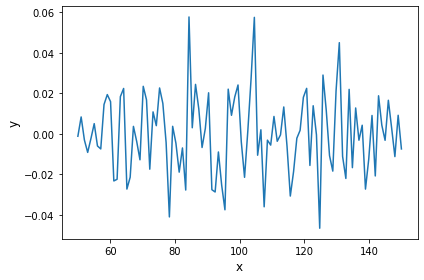

In [4]:
print('Accessing Fit Attributes:')
print('Objective Funtion Evaluations:\n', res.optimum_chi)
print('RMS:\n', res.rms)
#print('Parameters:\n', res.optimum_params)
#print('Fitted y:\n', res.y_fit)
print('Sign Combinations:\n', res.optimum_signs)
#print('Derivatives:\n', res.derivatives)

plt.plot(x, y - res.y_fit)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.tight_layout()
plt.show()

To fit the data with a CSF we can use the 'constraints' keyword argument in smooth(). 'constraints' sets the minimum constrained derivative for the function which for a CSF we want to be one.

In [5]:
res = smooth(
    x, y, N, constraints=1)

#############################################################
#############################################################
----------------------OPTIMUM RESULT-------------------------
Time: 33.483760595321655
Polynomial Order: 15
Number of Constrained Derivatives: 14
Signs : [ 1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1]
Objective Function Value: 0.03802149652798105
Parameters: [[ 4.93748563e+02 -1.22806043e+01  2.13827806e-01 -3.19800168e-03
   4.37392340e-05 -5.51832833e-07  6.84245066e-09 -9.61034650e-11
   1.20948841e-12 -7.52326727e-15  1.97606503e-17 -1.67921369e-18
   4.28322261e-20 -4.05570741e-22  1.39065244e-24]]
Method: qp-sign_flipping
Model: difference_polynomial
Constraints: m >= 1
Zero Crossings Used? (0 signifies Yes
 in derivative order "i"): {'0': 1}
-------------------------------------------------------------
#############################################################


Note in the printed results the number of constrained derivatives has increased by 1 and the only derivative that is allowed to cross through 0 (Zero Crossings Used?) is the the $0^{th}$ order i.e. the data.

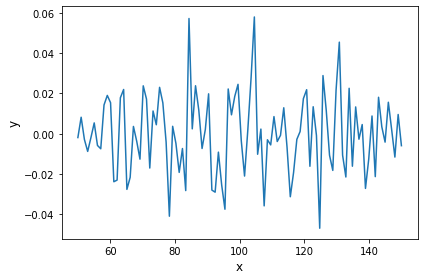

In [6]:
plt.plot(x, y - res.y_fit)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.tight_layout()
plt.show()

A Partially Smooth Function can have derivatives constrained via $m \geq a$ where $a$ is any order above 2 or it can have a set of derivatives that are allowed to cross zero. For the first case we can once again use the 'constraints' keyword argument. For example we can constrain derivatives with orders $\geq 3$ which will allow the $1^{st}$ and $2^{nd}$ order derivatives to cross zero. This is useful when our data features an inflection point we want to model with our fit.

#############################################################
#############################################################
----------------------OPTIMUM RESULT-------------------------
Time: 14.370133638381958
Polynomial Order: 15
Number of Constrained Derivatives: 12
Signs : [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
Objective Function Value: 0.037909459692167066
Parameters: [[ 4.93749220e+02 -1.22805475e+01  2.13814517e-01 -3.19833493e-03
   4.37844537e-05 -5.51447285e-07  6.78455514e-09 -9.60113051e-11
   1.24330850e-12 -7.84535586e-15  1.11339880e-17 -1.52805461e-18
   4.32819560e-20 -4.26970756e-22  1.50073159e-24]]
Method: qp-sign_flipping
Model: difference_polynomial
Constraints: m >= 3
Zero Crossings Used? (0 signifies Yes
 in derivative order "i"): {'0': 1, '1': 1, '2': 1}
-------------------------------------------------------------
#############################################################


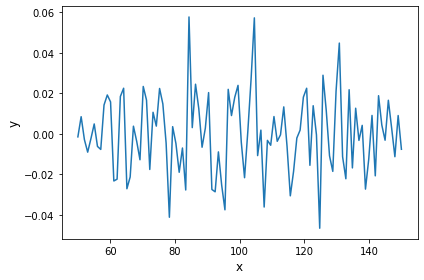

In [7]:
res = smooth(x, y, N, constraints=3)

plt.plot(x, y - res.y_fit)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.tight_layout()
plt.show()

To allow a particular set of derivatives to cross zero we use the 'zero_crossings' keyword. In the example below we are lifting the constraints on the $3^{rd}$, $4^{th}$ and $5^{th}$ order derivatives but our minimum constrained derivative is still set at the default 2. Therefore this PSF has derivatives of order $m = [2, 6, 7, 8, 9]$ constrained via the condition at the begining of this example code.

#############################################################
#############################################################
----------------------OPTIMUM RESULT-------------------------
Time: 10.035339117050171
Polynomial Order: 15
Number of Constrained Derivatives: 10
Signs : [-1 -1  1 -1  1 -1  1 -1  1 -1]
Objective Function Value: 0.03792267841457616
Parameters: [[ 4.93749238e+02 -1.22805262e+01  2.13814492e-01 -3.19848803e-03
   4.37836864e-05 -5.51153493e-07  6.78596702e-09 -9.62298365e-11
   1.24273312e-12 -7.78093678e-15  1.10504004e-17 -1.53240550e-18
   4.33310012e-20 -4.27555942e-22  1.50385405e-24]]
Method: qp-sign_flipping
Model: difference_polynomial
Constraints: m >= 2
Zero Crossing Derivatives: [3, 4, 5]
Zero Crossings Used? (0 signifies Yes
 in derivative order "i"): {'0': 1, '1': 1, '3': 1, '4': 1, '5': 1}
-------------------------------------------------------------
#############################################################


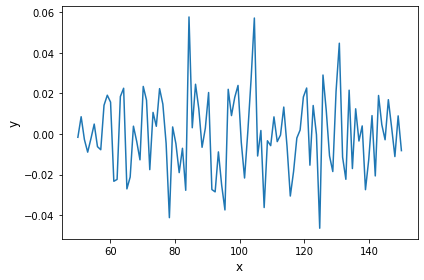

In [8]:
res = smooth(x, y, N, zero_crossings=[3, 4, 5])

plt.plot(x, y - res.y_fit)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.tight_layout()
plt.show()

While PSFs can seem like an attractive way to improve the quality of fit they are less 'smooth' than a MSF or CSF and consequently they can introduce additional turning points in to your residuals obscuring any signals of intrest.